In [1]:
import pandas as pd

In [2]:
he = pd.read_table(
    '../phase2.22/summary.he', 
    names=['chr', 'pop1', 'pop2', 'N', 'Mt', 'Mc', 'pb', 'i', 'grm', 'pghat'],
    index_col=list(range(9))
)

In [3]:
hsq = pd.read_table(
    '../phase2.22/summary.hsq',
    names=['chr', 'pop1', 'pop2', 'N', 'Mt', 'Mc', 'pb', 'i', 'grm', 'pghat', 'se'],
    index_col=list(range(9))
)

In [4]:
popcorn = pd.read_table(
    '../phase2.22/summary.popcorn',
    names=['chr', 'pop1', 'pop2', 'N', 'Mt', 'Mc', 'pb', 'i', 'cor', 'pghat', 'se', 'z', 'p'],
    index_col=list(range(9))
)

In [5]:
popcornr = pd.read_table(
    '../phase2.22/summary.popcornr',
    names=['chr', 'pop1', 'pop2', 'N', 'Mt', 'Mc', 'pb', 'i', 'cor', 'pghat', 'se', 'z', 'p'],
    index_col=list(range(9))
)

In [6]:
ratio = pd.read_table(
    '../phase2.22/summary.ratio', 
    names=['chr', 'pop1', 'pop2', 'N', 'Mt', 'Mc', 'pb', 'i', 'ratio'],
    index_col=list(range(8))
)

In [7]:
ge = pd.concat(
    [
        ratio.ratio*0.8,
        he.xs('kevin', level='grm').pghat,
        hsq.xs('kevin', level='grm').pghat,
        popcorn.xs('ge', level='cor').pghat,
        popcornr.xs('ge', level='cor').pghat
    ],
    axis=1)

In [8]:
ge.columns = ['pg', 'he', 'gcta', 'popcorn', 'popcornr']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

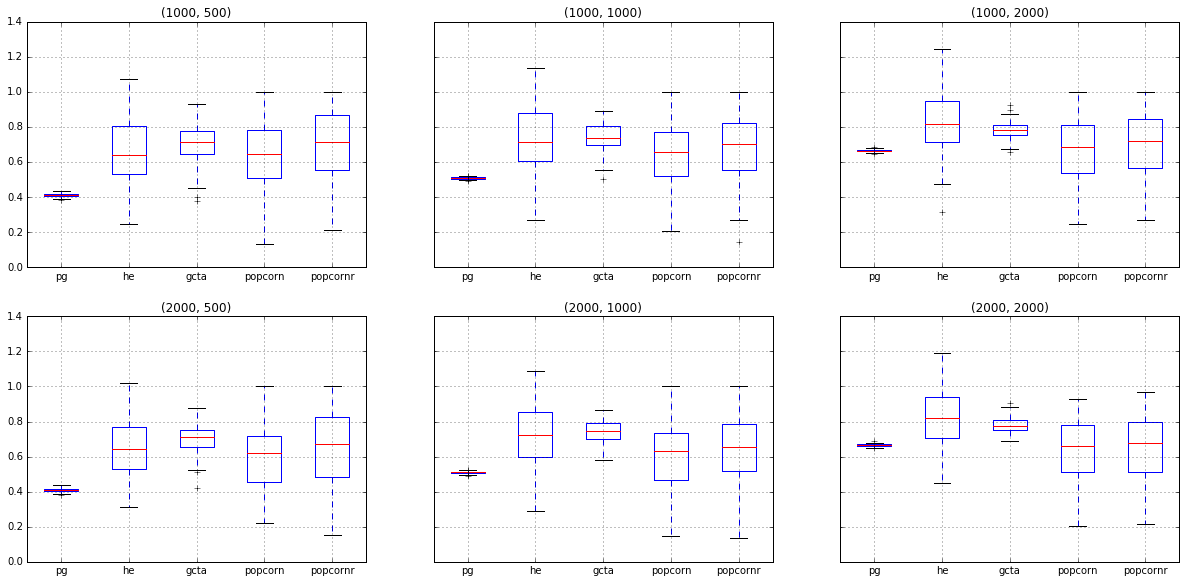

In [11]:
fig = plt.figure()
axs = ge.groupby(level=['N', 'Mt']).boxplot(
    return_type='axes',
    subplots=True, figsize=(20, 10), layout=(2,3)
)
plt.show()

C:\Users\kgali\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


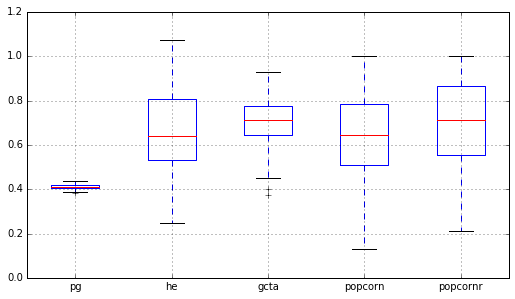

In [12]:
fig = plt.figure(figsize=(8.63,4.76))
ax = fig.add_subplot(1,1,1)
ge.xs((1000, 500), level=('N', 'Mt')).boxplot(return_type='axes', ax=ax)
fig.show()